#  Install Dependencies

In [1]:
!pip install tensorflow==2.15.0 keras==2.15 tensorflow-hub==0.13.0 tensorflow-text==2.15.0
!pip install tensorflow==2.15.0 keras==2.15 tensorflow-hub==0.13.0 tensorflow-text==2.15.0
!pip install datasets
!pip -q install evaluate
!pip install imbalanced-learn
# !pip install torch torchvision torchaudio
!pip install transformers datasets scikit-learn
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.6/100.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 84.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 84.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found exis

# Import Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from keras.layers import Input

import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from transformers import RobertaTokenizer

from sklearn.utils import shuffle


# Tensor Flow

import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Check if libraries are installed and print their versions
try:
    print(f"TensorFlow Hub Version: {hub.__version__}")
except ImportError:
    print("TensorFlow Hub is not installed.")

try:
    print(f"TensorFlow Text Version: {text.__version__}")
except ImportError:
    print("TensorFlow Text is not installed.")

try:
    print(f"TensorFlow Version: {tf.__version__}")
except ImportError:
    print("TensorFlow is not installed.")

try:
    print(f"pandas Version: {pd.__version__}")
except ImportError:
    print("pandas is not installed.")

try:
    print(f"scikit-learn Version: {train_test_split.__module__.split('.')[0]}")
except ImportError:
    print("scikit-learn is not installed.")

try:
    print(f"scikit-learn Version: {classification_report.__module__.split('.')[0]}")
except ImportError:
    print("scikit-learn is not installed.")

#other usefull

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
# from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

import seaborn as sns
import matplotlib.pyplot as plt

TensorFlow Hub Version: 0.13.0
TensorFlow Text Version: 2.15.0
TensorFlow Version: 2.15.0
pandas Version: 2.2.2
scikit-learn Version: sklearn
scikit-learn Version: sklearn


# Import Github

In [3]:
!git clone https://github.com/tajuar-akash-hub/Datasets.git

Cloning into 'Datasets'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 40 (delta 11), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (40/40), 3.87 MiB | 6.23 MiB/s, done.
Resolving deltas: 100% (11/11), done.


# Dataset Location

In [4]:
my_df_location = ('/kaggle/working/Datasets/sentence_without_gemini.csv')

# Data preprocessing for Bert

In [5]:
df = pd.read_csv(my_df_location)

df.head(2)


,generated_sentence_without_gemini,ClaimLegitimacy,fraud_status
0,"On 2024-07-08 00:00:00, a claim of $7820.52 wa...",Legitimate,0
1,"On 2024-07-08 00:00:00, a claim of $5453.86 wa...",Legitimate,0


In [8]:
df.iloc[200]['generated_sentence_without_gemini']  

'On 2024-05-25 00:00:00, a claim of $9784.38 was submitted for a Female patient aged 85 years. The patient is Widowed and currently Student, with an annual income of $26726.91. This claim is related to Orthopedics services rendered at the renowned facility located in New Thomasberg. The claim was submitted via Paper as part of a Routine case. The current status of this claim is Approved. This highlights the thorough process and diligence involved in managing claims.'

In [9]:
print(df.isnull().sum())

generated_sentence_without_gemini    0
ClaimLegitimacy                      0
fraud_status                         0
dtype: int64


# Sentence And target

In [10]:
df = df[['generated_sentence_without_gemini','fraud_status']]

## Train test split

In [11]:

from sklearn.model_selection import train_test_split


# Train-test split: Keep both columns together

train_data, test_data = train_test_split(
    df, stratify=df['fraud_status'], test_size=0.2, random_state=42
)

In [12]:
len(train_data)

2925

In [13]:
train_data['fraud_status'].value_counts()

fraud_status
0    2744
1     181
Name: count, dtype: int64

In [14]:
len(test_data)

732

In [15]:
test_data['fraud_status'].value_counts()

fraud_status
0    687
1     45
Name: count, dtype: int64

##  Apply RandomOverSampler to the training data


In [16]:
ros = RandomOverSampler(random_state=42)


# Perform oversampling

train_data_resampled, train_labels_resampled = ros.fit_resample(
    train_data[['generated_sentence_without_gemini']], train_data['fraud_status']
)


# Combine the resampled data back into a DataFrame

train_data_resampled = pd.concat(
    [train_data_resampled['generated_sentence_without_gemini'], train_labels_resampled], axis=1
)


In [17]:
train_data_resampled['fraud_status'].value_counts()

fraud_status
0    2744
1    2744
Name: count, dtype: int64

In [18]:
# Shuffle the oversampled training data

train_data_resampled = shuffle(train_data_resampled, random_state=42)


In [19]:
# Print the distribution after oversampling

from collections import Counter
print("Training distribution after oversampling:", Counter(train_data_resampled['fraud_status']))


Training distribution after oversampling: Counter({1: 2744, 0: 2744})


In [20]:
# Separate features and labels after oversampling

train_texts = train_data_resampled['generated_sentence_without_gemini'].tolist()
train_labels = train_data_resampled['fraud_status'].tolist()


test_texts = test_data['generated_sentence_without_gemini'].tolist()
test_labels = test_data['fraud_status'].tolist()


# Tokenizer 

In [21]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [22]:
# Tokenize the training and test sets

train_encodings = tokenizer(
    train_texts, truncation=True, padding=True, max_length=512
)


test_encodings = tokenizer(
    test_texts, truncation=True, padding=True, max_length=512
)

In [23]:
# Convert to Dataset

from datasets import Dataset

def create_dataset(encodings, labels):
    return Dataset.from_dict({
        'input_ids': encodings['input_ids'],
        'attention_mask': encodings['attention_mask'],
        'labels': labels
    })

train_dataset = create_dataset(train_encodings, train_labels)
test_dataset = create_dataset(test_encodings, test_labels)

### Train Model

In [24]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments
import evaluate
import numpy as np

# Model Initialization
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Define Training Arguments
training_args = TrainingArguments(
    output_dir='./bert-results',           # Directory for saving results
    evaluation_strategy="epoch",          # Evaluate at the end of each epoch
    save_strategy="epoch",                # Save model at the end of each epoch
    learning_rate=2e-5,                   # Learning rate
    per_device_train_batch_size=16,       # Training batch size
    per_device_eval_batch_size=16,        # Evaluation batch size
    num_train_epochs=5,                   # Number of training epochs
    weight_decay=0.01,                    # Weight decay
    logging_dir='./logs',                 # Directory for logging
    logging_steps=10,                     # Log every 10 steps
    save_total_limit=2,                   # Keep the last 2 checkpoints
    load_best_model_at_end=True,          # Load the best model at the end of training
    metric_for_best_model="accuracy",     # Metric to select the best model
    fp16=True,                            # Enable mixed precision training
    report_to="none"                      # Disable reporting to external services
)

# Define Metrics
# Define Metrics
def compute_metrics(eval_pred):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return {
        "accuracy": accuracy_score(labels, predictions),
        "precision": precision_score(labels, predictions, average="weighted"),
        "recall": recall_score(labels, predictions, average="weighted"),
        "f1": f1_score(labels, predictions, average="weighted"),
        "mcc": matthews_corrcoef(labels, predictions)
    }


# Trainer Initialization
trainer = Trainer(
    model=model,                  # The model
    args=training_args,           # Training arguments
    train_dataset=train_dataset,  # The training dataset
    eval_dataset=test_dataset,    # The evaluation dataset
    tokenizer=tokenizer,          # Tokenizer
    compute_metrics=compute_metrics  # Custom metrics
)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-24-701c244ac38a>:43: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [25]:
# Train the Model

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Mcc
1,0.305500,0.304852,0.849727,0.945730,0.849727,0.883123,0.433349
2,0.091500,0.058503,0.986339,0.988179,0.986339,0.986856,0.894116
3,0.002200,0.082010,0.982240,0.981646,0.982240,0.981750,0.839304
4,0.000300,0.070025,0.986339,0.985994,0.986339,0.986041,0.877552
5,0.007000,0.087645,0.984973,0.984808,0.984973,0.984187,0.862325


TrainOutput(global_step=1715, training_loss=0.13659051837014038, metrics={'train_runtime': 351.191, 'train_samples_per_second': 78.134, 'train_steps_per_second': 4.883, 'total_flos': 1607526326044800.0, 'train_loss': 0.13659051837014038, 'epoch': 5.0})

# Accuracy information 

In [26]:
# Evaluate on Test Set

results = trainer.evaluate(eval_dataset=test_dataset)
print("Evaluation Results:", results)


Evaluation Results: {'eval_loss': 0.05850253254175186, 'eval_accuracy': 0.9863387978142076, 'eval_precision': 0.9881785635705426, 'eval_recall': 0.9863387978142076, 'eval_f1': 0.9868563943831139, 'eval_mcc': 0.8941160300775769, 'eval_runtime': 2.4721, 'eval_samples_per_second': 296.107, 'eval_steps_per_second': 18.608, 'epoch': 5.0}


# Confusion Matrix

True Negative (TN): 678
False Positive (FP): 9
False Negative (FN): 1
True Positive (TP): 44


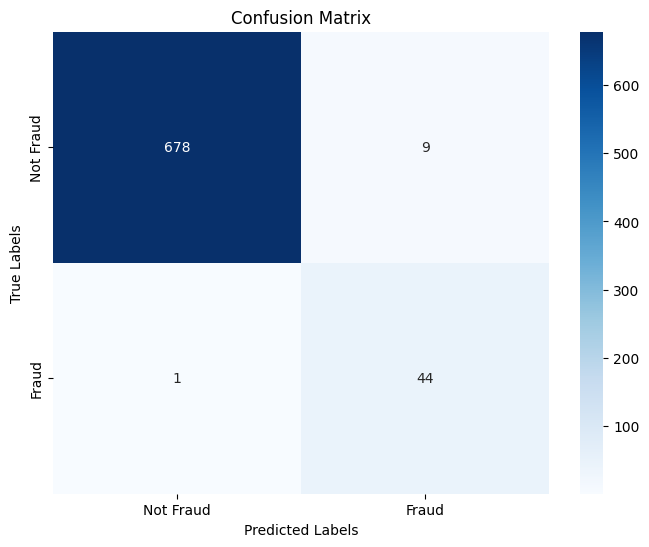

In [27]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Step 1: Get Predictions from Trainer
predictions = trainer.predict(test_dataset)
predicted_labels = np.argmax(predictions.predictions, axis=1)  # Convert logits to predicted labels
true_labels = predictions.label_ids  # Actual labels from the dataset

# Step 2: Compute Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Step 3: Extract Values
tn, fp, fn, tp = cm.ravel()

# Print Results
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Positive (TP): {tp}")

# Optional: Plot the Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Training Loss

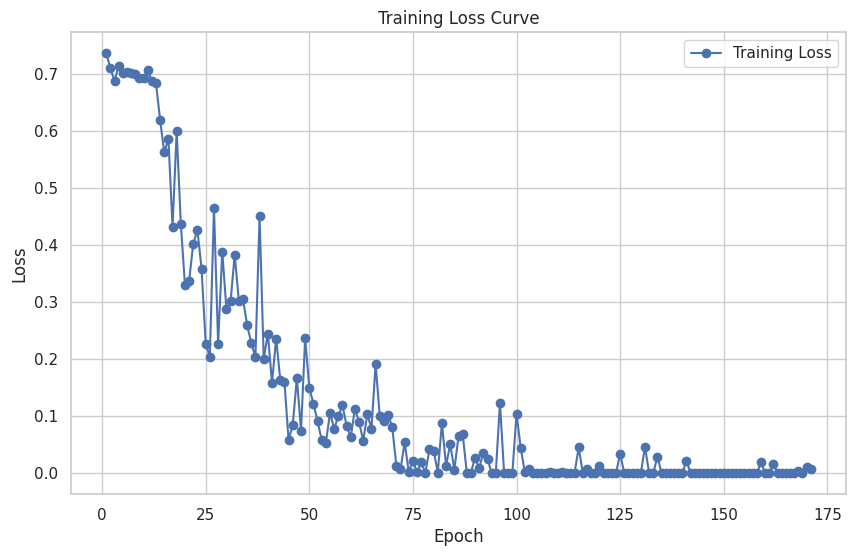

In [28]:
# Extract Training Logs
# Import necessary libraries


training_logs = trainer.state.log_history

# Extract Loss Values for Plotting
train_loss = [log["loss"] for log in training_logs if "loss" in log]

# Plot Training Loss Curve
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
epochs = list(range(1, len(train_loss) + 1))
plt.plot(epochs, train_loss, marker='o', linestyle='-', label='Training Loss', color='b')

# Add labels, title, and legend
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()

# Show the plot
plt.show()

# Training validation loss

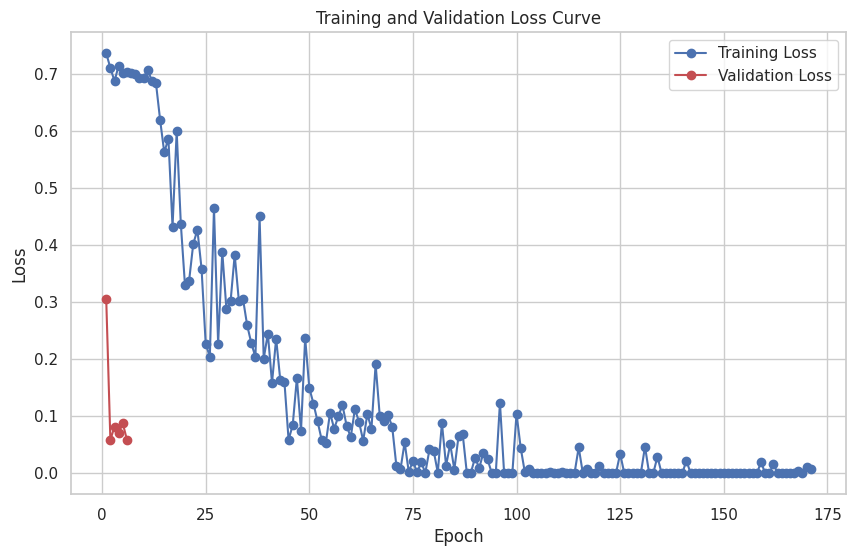

In [29]:
# Extract Training and Validation Logs
training_logs = trainer.state.log_history

# Extract Loss Values for Training and Validation
train_loss = [log["loss"] for log in training_logs if "loss" in log]
val_loss = [log["eval_loss"] for log in training_logs if "eval_loss" in log]

# Plot Training and Validation Loss Curves
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Define epochs for both curves
epochs_train = list(range(1, len(train_loss) + 1))
epochs_val = list(range(1, len(val_loss) + 1))

# Plot the curves
plt.plot(epochs_train, train_loss, marker='o', linestyle='-', label='Training Loss', color='b')
plt.plot(epochs_val, val_loss, marker='o', linestyle='-', label='Validation Loss', color='r')

# Add labels, title, and legend
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curve')
plt.legend()

# Show the plot
plt.show()


# ROC Curve

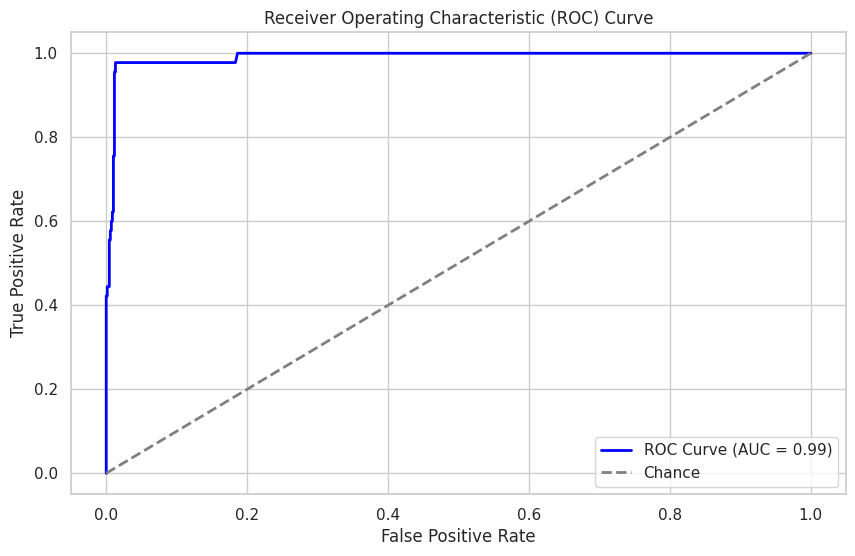

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate predictions from the model
predictions = trainer.predict(test_dataset)

# Extract true labels and probabilities for the positive class
true_labels = predictions.label_ids
predicted_probabilities = predictions.predictions[:, 1]  # Probabilities for the positive class

# Compute ROC Curve
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Chance')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
